<a href="https://colab.research.google.com/github/Titankhoa/ThucHanhXuLyAnhSo/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 04: Ph√¢n v√πng ·∫£nh


1. C√†i ƒë·∫∑t th∆∞ vi·ªán

In [1]:
pip install opencv-python


2. Viet chuong trinh ph√¢n v√πng ·∫£nh


2.1 Ph√¢n v√πng theo histogram

In [3]:
from google.colab import files
uploaded = files.upload()


Saving fruit.jpg to fruit.jpg


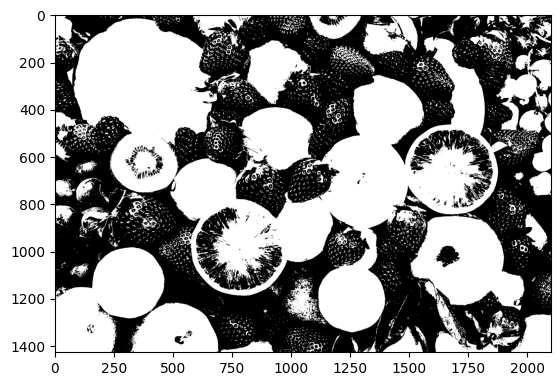

In [4]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_otsu

data = Image.open('fruit.jpg').convert('L')

a = np.asarray (data)

# performing Otsu's thresholding
thres = threshold_otsu (a)

# pixels with intensity greater than theshold are kept
b = a > thres
b = Image.fromarray(b)

plt.imshow(b)
plt.show()

2.1.2 Ph∆∞∆°ng ph√°p Adaptive Thresholding


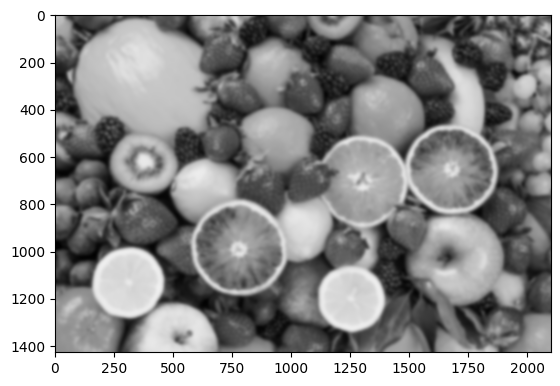

In [6]:

from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data= Image.open('fruit.jpg') .convert('L')

a = np.asarray(data)

# performing local thresholding
b = threshold_local(a, 39, offset=10)

b = Image.fromarray (b)

plt.imshow(b)
plt.show()

2.2 Ph√¢n v√πng theo region

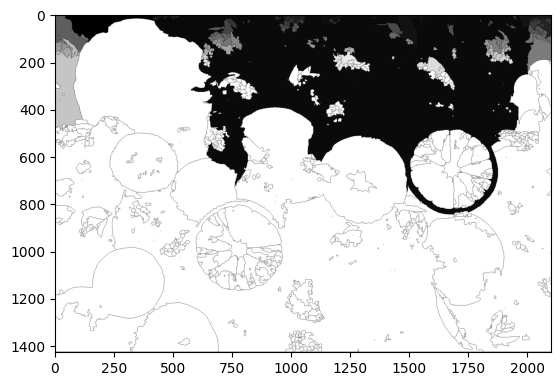

In [10]:

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = cv2.imread('fruit.jpg')
#covnerting image from color to grayscale
a = cv2.cvtColor (data, cv2.COLOR_BGR2GRAY)
# thresholding the image to obtain cell pixels
thresh, bl = cv2.threshold (a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# since Otsu's method has over segmented the image
# erosion operation is performed
b2 = cv2.erode (bl, None, iterations = 2)
# distance transform is performed
dist_trans = cv2.distanceTransform (b2, 2, 3)
# thresholding the distance transform image to obtain
# pixels that are foreground
thresh, dt = cv2.threshold (dist_trans, 1, 255, cv2.THRESH_BINARY)
# performing labeling
labelled, ncc = label (dt)
#labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)
# performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()

2.3 Bi·∫øn ƒë·ªïi ƒë·ªëi t∆∞·ª£ng trong ·∫£nh


2.3.1 S·ª≠ d·ª•ng binary_dilation


In [15]:
from google.colab import files
uploaded = files.upload()

Saving dil_img.gif to dil_img.gif


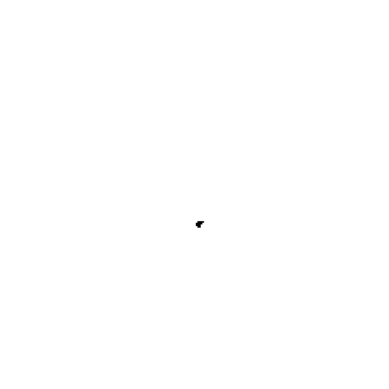

In [18]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('')
b = nd.binary_dilation (data, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.2 S·ª≠ d·ª•ng binary_opening


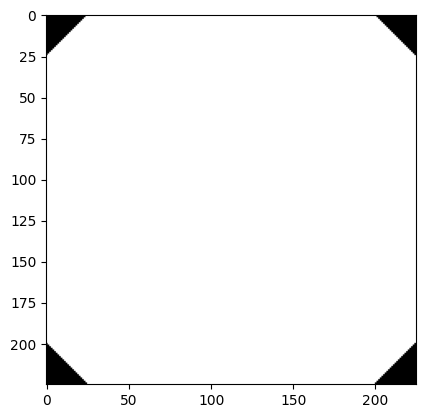

In [21]:

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data= Image.open('dil_img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray (b)
c.show()
plt.imshow(c)
plt.show()

2.3.3 S·ª≠ d·ª•ng binary_erosion

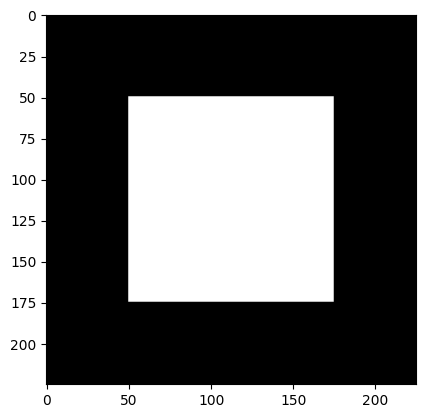

In [22]:

import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
#opening the image and converting it to grayscale
data= Image.open('dil_img.gif').convert('L')
#defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b= nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray (b)
c.show()
plt.imshow(c)
plt.show()

2.3.4 S·ª≠ d·ª•ng binary_closing


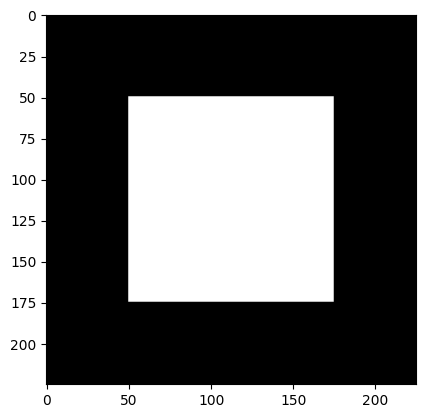

In [23]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data= Image.open('dil_img.gif').convert('L')
#defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing (data, structure=s, iterations=50)

c = Image.fromarray (b)
c.show()
plt.imshow (c)
plt.show()

3. B√ÄI T·∫¨P

B√†i 1: LangBiang ‚Äì T·ªãnh ti·∫øn v√† Otsu Threshold

In [29]:
from google.colab import files
uploaded = files.upload()

Saving dalat.jpg to dalat.jpg


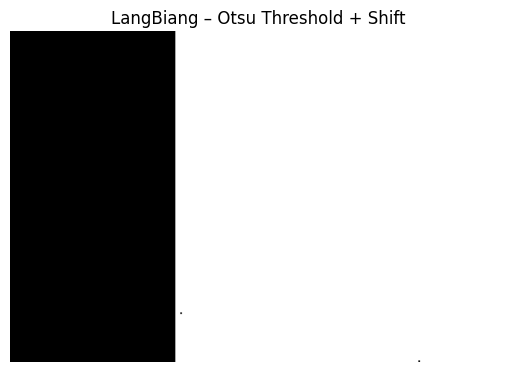

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# ƒê·ªçc ·∫£nh v√† ch·ªçn v√πng LangBiang
img = cv2.imread('dalat.jpg')
roi = img[100:300, 200:400]  # V√πng ·∫£nh gi·∫£ ƒë·ªãnh

# T·ªãnh ti·∫øn v√πng ch·ªçn sang ph·∫£i 100px
h, w = roi.shape[:2]
M = np.float32([[1, 0, 100], [0, 1, 0]])
shifted = cv2.warpAffine(roi, M, (w + 100, h))

# Chuy·ªÉn sang ·∫£nh x√°m v√† d√πng Otsu
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh_val = threshold_otsu(gray)
binary = (gray > 0.3 * thresh_val).astype(np.uint8) * 255

# L∆∞u v√† hi·ªÉn th·ªã
cv2.imwrite("lang_biang.jpg", binary)
plt.imshow(binary, cmap='gray')
plt.title("LangBiang ‚Äì Otsu Threshold + Shift")
plt.axis('off')
plt.show()


B√†i 2: H·ªì Xu√¢n H∆∞∆°ng ‚Äì Xoay v√† Adaptive Threshold

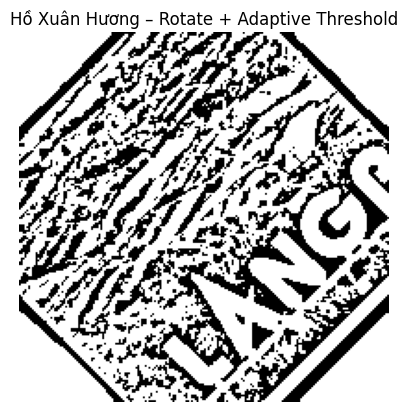

In [34]:
from skimage.filters import threshold_local

# ƒê·ªçc ·∫£nh v√† ch·ªçn v√πng H·ªì Xu√¢n H∆∞∆°ng
img = cv2.imread('dalat.jpg')
roi = img[150:350, 100:300]  # V√πng ·∫£nh gi·∫£ ƒë·ªãnh

# Xoay 45 ƒë·ªô
h, w = roi.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(roi, M, (w, h))

# Adaptive threshold
gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
local_thresh = threshold_local(gray, block_size=21, offset=10)
binary = (gray > local_thresh).astype(np.uint8) * 255

# L∆∞u v√† hi·ªÉn th·ªã
cv2.imwrite("ho_xuan_huong.jpg", binary)
plt.imshow(binary, cmap='gray')
plt.title("H·ªì Xu√¢n H∆∞∆°ng ‚Äì Rotate + Adaptive Threshold")
plt.axis('off')
plt.show()


B√†i 3: Qu·∫£ng tr∆∞·ªùng L√¢m Vi√™n ‚Äì Shift + Binary Closing

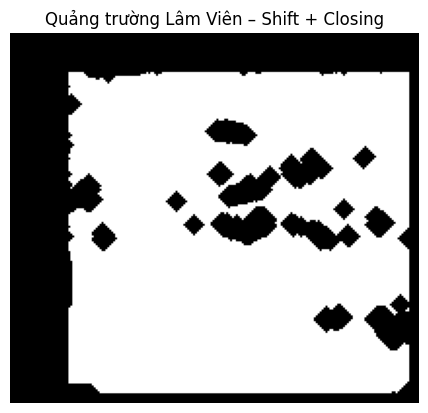

In [35]:
import scipy.ndimage as nd

# ƒê·ªçc ·∫£nh v√† ch·ªçn v√πng L√¢m Vi√™n
img = cv2.imread('dalat.jpg')
roi = img[200:370, 300:480]  # V√πng ·∫£nh gi·∫£ ƒë·ªãnh

# Shift v√πng ·∫£nh
M = np.float32([[1, 0, 30], [0, 1, 20]])
mapped = cv2.warpAffine(roi, M, (roi.shape[1] + 30, roi.shape[0] + 20))

# Chuy·ªÉn sang nh·ªã ph√¢n
gray = cv2.cvtColor(mapped, cv2.COLOR_BGR2GRAY)
binary = (gray > 128).astype(np.uint8)

# Binary closing
closed = nd.binary_closing(binary, iterations=5).astype(np.uint8) * 255

# L∆∞u v√† hi·ªÉn th·ªã
cv2.imwrite("quan_truong_lam_vien.jpg", closed)
plt.imshow(closed, cmap='gray')
plt.title("Qu·∫£ng tr∆∞·ªùng L√¢m Vi√™n ‚Äì Shift + Closing")
plt.axis('off')
plt.show()


B√†i 4: T·∫°o Menu l·ª±a ch·ªçn x·ª≠ l√Ω

===== MENU =====
1. LangBiang ‚Äì Shift + Otsu
2. H·ªì Xu√¢n H∆∞∆°ng ‚Äì Rotate + Adaptive Threshold
3. Qu·∫£ng tr∆∞·ªùng L√¢m Vi√™n ‚Äì Shift + Closing
4. Tho√°t
Ch·ªçn s·ªë 1‚Äì3: 1


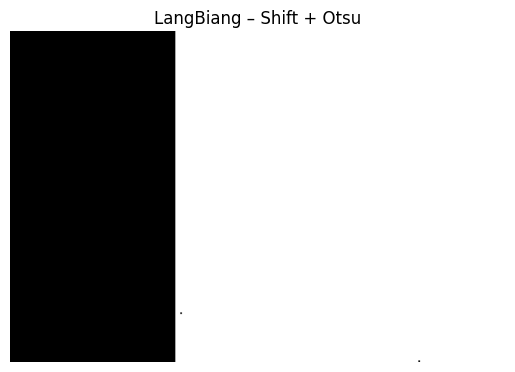

In [41]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from skimage.filters import threshold_otsu, threshold_local

def shift_image(img, x, y):
    h, w = img.shape[:2]
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(img, M, (w + x, h + y))

def process_lang_biang():
    path = 'dalat.jpg'
    if not os.path.exists(path):
        print(f"‚ùå Kh√¥ng t√¨m th·∫•y ·∫£nh: {path}")
        return

    img = cv2.imread(path)
    if img is None:
        print("‚ùå OpenCV kh√¥ng ƒë·ªçc ƒë∆∞·ª£c ·∫£nh.")
        return

    roi = img[100:300, 200:400]
    shifted = shift_image(roi, 100, 0)

    gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    thresh_val = threshold_otsu(gray)
    binary = (gray > 0.3 * thresh_val).astype(np.uint8) * 255

    cv2.imwrite("lang_biang.jpg", binary)
    plt.imshow(binary, cmap='gray')
    plt.title("LangBiang ‚Äì Shift + Otsu")
    plt.axis('off')
    plt.show()

def process_ho_xuan_huong():
    path = 'dalat.jpg'
    if not os.path.exists(path):
        print(f"‚ùå Kh√¥ng t√¨m th·∫•y ·∫£nh: {path}")
        return

    img = cv2.imread(path)
    roi = img[150:350, 100:300]
    h, w = roi.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), 45, 1)
    rotated = cv2.warpAffine(roi, M, (w, h))

    gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
    local_thresh = threshold_local(gray, block_size=21, offset=10, method='mean')
    binary = (gray > local_thresh).astype(np.uint8) * 255

    cv2.imwrite("ho_xuan_huong.jpg", binary)
    plt.imshow(binary, cmap='gray')
    plt.title("H·ªì Xu√¢n H∆∞∆°ng ‚Äì Rotate + Adaptive Threshold")
    plt.axis('off')
    plt.show()


def process_quan_truong_lam_vien():
    path = 'dalat.jpg'
    if not os.path.exists(path):
        print(f"‚ùå Kh√¥ng t√¨m th·∫•y ·∫£nh: {path}")
        return

    img = cv2.imread(path)
    roi = img[200:370, 300:480]
    shifted = shift_image(roi, 30, 20)

    gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    binary = (gray > 128).astype(np.uint8)
    closed = nd.binary_closing(binary, iterations=5).astype(np.uint8) * 255

    cv2.imwrite("quan_truong_lam_vien.jpg", closed)
    plt.imshow(closed, cmap='gray')
    plt.title("L√¢m Vi√™n ‚Äì Shift + Closing")
    plt.axis('off')
    plt.show()

# ============ MENU ============
def menu():
    print("===== MENU =====")
    print("1. LangBiang ‚Äì Shift + Otsu")
    print("2. H·ªì Xu√¢n H∆∞∆°ng ‚Äì Rotate + Adaptive Threshold")
    print("3. Qu·∫£ng tr∆∞·ªùng L√¢m Vi√™n ‚Äì Shift + Closing")
    print("4. Tho√°t")

    choice = input("Ch·ªçn s·ªë 1‚Äì3: ")
    if choice == '1':
        process_lang_biang()
    elif choice == '2':
        process_ho_xuan_huong()
    elif choice == '3':
        process_quan_truong_lam_vien()
    else:
        print("üö™ Tho√°t ch∆∞∆°ng tr√¨nh.")

menu()
